Today, we will discuss a binary heaps, a common data structure in programming.
Heaps have multiple uses in programming including:

**Priority Queues** : a queue-like data structure which has a priority field as a key. In a priority queue implemented with a min-heap, the element with the lowest value for priority will the next available element. In a priority queue implemented with a max-heap, the element with the highest value for priority will be the next available element.

**Finding the k'th [small/larg]est element** : Heaps are really good at solving this problem, because after creating a heap from the target elements, the lowest (min-heap implementation) or the highest (max-heap implementation) values can be extracted with ease.

## Imported to Archive and fixed up on Mar 5, 2025

Today, we will discuss a binary heaps, a common data structure in programming.
Heaps have multiple uses in programming including:
  * **Priority Queues** : a queue-like data structure which has a priority field as a key. In a priority queue implemented with a min-heap, the element with the lowest value for priority will the next available element. In a priority queue implemented with a max-heap, the element with the highest value for priority will be the next available element.

  * **Finding the k'th [small/larg]est element** : Heaps are really good at solving this problem, because after creating a heap from the target elements, the lowest (min-heap implementation) or the highest (max-heap implementation) values can be extracted with ease.

Heaps are very useful when you need to retrieve the max (max-heap) or min
(min-heap) quickly ($O(\log n)$), need to add an element with a certain
value quickly ($O(\log n)$), and need to be able to build the structure
quickly ($O(\log n)$).  Binary heaps are a data structure with two
important properties:

  * **Nearly** **Complete** : every level of the tree is filled, except the last level, which can be partially filled from left to right.
  * In a **min-heap** , a child cannot be smaller than its parent; in a **max-heap** , a child cannot be larger than its parent.

Because of the second property, in a max-heap, the root node is the largest
value; in a max-heap, it is the smallest value.


Below is a proper max-heap. Note that no child is greater than its parent?:

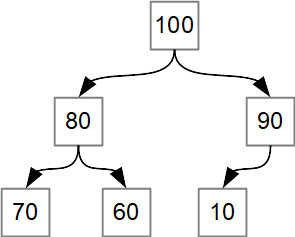

Below is a proper min-heap. Note that no child is smaller than its parent?:

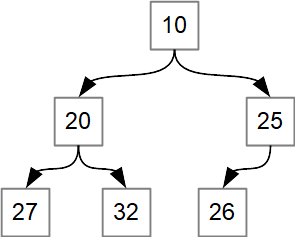

What is wrong with the tree below?

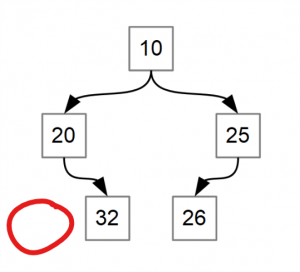

* It is not nearly-complete. To be nearly complete, every row must be filled from top to the bottom, except the last row, which must be filled from left to right until full.
* In order for a tree to be nearly complete, every row except the last must be completely filled. The last row should be filled from left to right.
* In this example, the bottom row is not filled from left to right.
    
Why is the following tree not a heap?

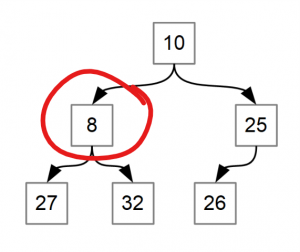

This tree does not conform with the min-heap property that every child should be larger than its parent. In this case, 8 is less than 10, so it fails.

## Representation of Heaps in Memory

While heaps can be visualized as binary trees, implementing them as actual
trees is naive. Because they are nearly-complete, it is possible to implement
them using arrays. Heaps are laid out in memory in level-order. Because heaps
are laid out in level order when implemented as an array, if we traverse the
array from left to right, we traverse the heap's tree in level-order, going
from left to right, then top to bottom. In the image below, the red arrows
show the order in which elements are visited:

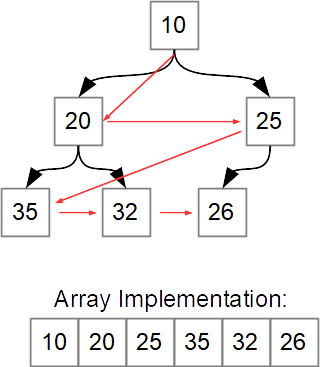

The root of the tree is the first
element in the array: $\text{root}=\text{arr}[0]$ The other nodes are
found using the following relations:

* Parent node: $\text{parent}=\text{arr}[\lfloor\frac{i-1}{2}\rfloor]$
* Left child node: $\text{left child}=\text{arr}[(2\times i)+1]$
* Right child node: $\text{right child}=\text{arr}[(2\times i)+2]$

## Heap Operations

### Element Class Definition and Helper Functions

```cpp
class Element {
public:
  int key;
  int value;

  inline Element() :
    key(0),
    value(0)
  {}
};

size_t parent(size_t pos) {
  return (i - 1) / 2;
}

size_t left(size_t pos) {
  return 2 * i + 1;
}

size_t right(size_t pos) {
  return 2 * i + 2;
}

void swap(Element& a, Element& b) {
  Element& tmp = a;
  a = b;
  b = tmp;
}
```

### MinHeap Class Definition

```cpp
class MinHeap {
  std::vector arr;
  
  Element getMin();
  Element extractMin();
  void decreaseKey(size_t index, int new_key);
  void insert(Element e);
  void remove(size_t index);
  void buildHeap(std::vector elements);
  
};
```

### MaxHeap Class Definition

```cpp
class MaxHeap {
  std::vector arr;

  Element getMax();
  Element extractMax();
  void increaseKey(size_t index, int new_key);
  void insert(Element e);
  void remove(size_t index);
  void buildHeap(std::vector elements);
};
```

### Heap getMin() / getMax() Operation

The function, getMin() returns the minimum element in a min-heap. This is
relatively simple to do, because, the minimum element in a min-heap is the
root node. In the second section, we discussed how the root node is the first
element in the array containing the heap. Thus, the getMin() function would be
implemented as such:

```cpp
Element MinHeap::getMin() {
  if(arr.size() == 0)
    return Element();
  return arr[0];
}

Element MaxHeap::getMax() {
  if(arr.size() == 0)
    return Element();
  return arr[0];
}
```

The time complexity of getMin()/getMax() is $O(1)$. The space complexity
of getMin()/getMax() is $O(1)$ because no allocations are made throughout
the algorithm.

### Heap extractMin()/extractMax() Operation

The function, extractMin()/extractMax() returns the current minimum (or
maximum) from the heap, and then removes it from the heap. The functions
extractMin() and extractMax() can be implemented as such:

```cpp
Element MinHeap::extractMin() {
  if(arr.size() == 0)
    return Element();

  Element root = arr[0];
  arr[0] = arr[arr.size() - 1];

  arr.pop_back();

  minHeapify(0);

  return root;
}

Element MaxHeap::extractMax() {
  if(arr.size() == 0)
    return Element();

  Element root = arr[0];
  arr[0] = arr[arr.size() - 1];

  arr.pop_back();

  maxHeapify(0);

  return root;
}
```

#### How does extractMin() / extractMax() work?

  1. Check to see if the array is not empty. This would result in an error if true.
  2. Store the root (0th element) in a temporary variable, $root$.
  3. Overwrite the root with the last element in the heap, $arr[arr.\text{size}() - 1]$.
  4. Reduce the size of the heap by one, by truncating the last value (arr.pop_back()).
  5. Heapify the root (0th element).
  6. Return original the root from the temporary variable.

The time complexity of these operations is $O(h)=O(\lceil \log n\rceil)$,
where $h$ is the height of the tree

### Heap minHeapify()/maxHeapify Operation

`minHeapify()` and `maxHeapify()` are operations which heapify an element into its
right place. a subtree with the root index passed in. The heapify operation
assumes that the subtrees of the subtree being heapified are already heapified
(proper heaps). Both operations take a maximum time of $O(h)$ where
$h$ is the height of the tree. Thus, the maximum time complexity of
heapify() is $O(\log n)$

```cpp    
void MinHeap::minHeapify(size_t pos) {
  // Calculate the address of the left and right children
  int l = left(pos);
  int r = right(pos);
  // Initialize smallest so it is pointing to the parent node
  int smallest = pos;

  // These if statements set smallest to l or r if l or r are smaller
  // than the current smallest
  if(l < arr.size() && arr[l] < arr[pos].key) {
    smallest = l;
  }
  if(r < arr.size() && arr[r] < arr[smallest].key) {
    smallest = r;
  }

  // This if statement checks to see if smallest changed through
  // the two if statements. If it did, the smallest element is swapped
  // with the parent. Heapify is thereafter called on the new location
  // for the original root
  if(smallest != pos) {
    swap(arr[pos], arr[smallest]);
    minHeapify(smallest);
  }
}

void MaxHeap::maxHeapify(size_t pos) {
  // Calculate the address of the left and right children
  int l = left(pos);
  int r = right(pos);
  // Initialize the largest value to the root node
  int largest = pos;

  // These two if statements set largest to l or r respectively if
  // l or r is smaller than smallest.
  if(l < arr.size() && arr[l] > arr[pos].key) {
    largest = l;
  }
  if(r < arr.size() && arr[r] > arr[pos].key) {

    largest = r;
  }

  // This if statement checks to see if largest changed through
  // the two if statements. If it did, the largest element is swapped
  // with the parent. Heapify is thereafter called on the new location
  // for the original root
  if(largest != pos) {
    swap(arr[pos], arr[largest];
    maxHeapify(largest);
  }
}
```

#### How minHeapify() and maxHeapify() work:

1. Addresses of the left and right children are calculated by the first two lines
2. The smallest of, left, right and the current node is found using the first two if statements.
3. The third if statement checks to see if smallest or largest no longer point to the node pointed by pos. 
    1. If smallest / largest does not equal pos, we swap the values of both, and then heapify the child pointed by smallest / largest.

### Heap decreaseKey() and increaseKey() Operation

To decrease the key of a value in a min-heap, you may use the decreaseKey()
operation. To increase the key of a value in a max-heap, you may use the
increaseKey() operation. Both operations take $O(\log n)$ time.

```cpp    
void MinHeap::decreaseKey(size_t position, int new_key) {
  arr[position].key = new_key;

  while(position != 0 && arr[parent(position)] > arr[position]) {
    swap(arr[position], arr[parent(position)]);
    position = parent(position);
  }
}

void MaxHeap::increaseKey(size_t position, int new_key) {
  arr[position].key = new_key;

  while(position != 0 && arr[parent(position)] < arr[position]) {
    swap(arr[position], arr[parent(position)]);
    position = parent(position);
  }
}
```

### Heap insert() Operation

The insert() operation of a heap inserts a value in its correct position. It
takes up to $O(h)=O(\log n)$ time.

```cpp
void MinHeap::insert(Element e) {
  size_t pos = arr.size();
  arr.push_back(e);

  while(pos != 0 && arr[parent(pos)] > arr[pos]) {
    swap(arr[pos], arr[parent(pos)]);
    pos = parent(pos);
  }
}

void MaxHeap::insert(Element e) {
  size_t pos = arr.size();
  arr.push_back(e);

  while(pos != 0 && arr[parent(pos)] < arr[pos]) {
    swap(arr[pos], arr[parent(pos)]);
    pos = parent(pos);
  }
}
```

To insert an element into a heap, the insert() operation inserts a key at the
end of the array, and then moves it upwards in the tree until it is in the
right spot.

### Heap remove() Operation

To delete an element in a min-heap, we need to make it the root element, and
then extract it. In a min-heap, we can do this by setting its key to the
current root - 1, and in a max-heap, we can do this by setting the its key to
the current root + 1. To move the element to its new position, we call
decreaseKey() or increaseKey() respectively. This operation takes up to
$(O(h)=O(\log n)$ time.

```cpp
void MinHeap::remove(size_t index) {
  decreaseKey(i, arr[0].key - 1);
  extractMin();
}

void MaxHeap::remove(size_t index) {
  increaseKey(i, arr[0].key + 1);
  extractMin();
}
```

### Heap buildHeap() Operation

Here is a function which builds a heap from an array: BuildHeap() has a time
complexity of $O(n)$

```cpp
void MaxHeap::buildMaxHeap(std::vector array) {
  arr = array;
  for(size_t i = arr.size() / 2; i != 0; i--) {
    maxHeapify(i);
  }
}

void MinHeap::buildMaxHeap(std::vector array) {
  arr = array;
  for(size_t i = arr.size() / 2; i != 0; i--) {
    minHeapify(i);
  }
}
```

## HeapSort

Heaps are actually very useful for sorting. Using buildHeap(), we can
effectively build a heap in $O(n)$ time, and then we can extract each
minimum in the array in $O(h)$ time. This means that we can extract every
element in sorted order in $(O(n\log n)$.

```cpp    
std::vector sortAscending(std::vector& v) {
  MinHeap minh;
  minh.buildHeap(v);
  while(minh.arr.size() != 0) {
    minh.arr.push_back(minh.extractMin());
  }

  return minh.arr;
}

std::vector sortDescending(std::vector& v) {
  MaxHeap maxh;
  maxh.buildHeap(v);
  while(maxh.arr.size() != 0) {
    maxh.arr.push_back(maxh.extractMin());
  }

  return maxh.arr;
}
```